# Estatística Prática para Cientistas de Dados
## Peter Bruce & Andrew Bruce

### Capítulo 2: Distribuições de Dados e Amostras


In [1]:
# Importações

import pandas as pd
import numpy as np

from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt


In [2]:
# Conjunto de Dados

PATH = '../database/'

LOANS_INCOME = PATH + 'loans_income.csv'
SP500_DATA_CSV = PATH + 'sp500_data.csv.gz'


#### Distribuição de Amostragem de um Estatística

loans_income:


0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

sample_data:


,income,type
44138,55000,Data
230,56000,Data
13167,76183,Data
34473,75000,Data
11063,71250,Data
...,...,...
19951,65000,Data
17044,85000,Data
4817,180000,Data
23573,32625,Data


sample_mean_05:


,income,type
0,71600.0,Mean of 5
1,40000.0,Mean of 5
2,79300.0,Mean of 5
3,80800.0,Mean of 5
4,81700.0,Mean of 5
...,...,...
995,75862.0,Mean of 5
996,70078.2,Mean of 5
997,62600.0,Mean of 5
998,62242.4,Mean of 5


sample_mean_20:


,income,type
0,78955.00,Mean of 20
1,60740.00,Mean of 20
2,63447.80,Mean of 20
3,71930.90,Mean of 20
4,67865.70,Mean of 20
...,...,...
995,65375.50,Mean of 20
996,60589.60,Mean of 20
997,62723.60,Mean of 20
998,64406.75,Mean of 20


results:


,income,type
44138,55000.00,Data
230,56000.00,Data
13167,76183.00,Data
34473,75000.00,Data
11063,71250.00,Data
...,...,...
995,65375.50,Mean of 20
996,60589.60,Mean of 20
997,62723.60,Mean of 20
998,64406.75,Mean of 20


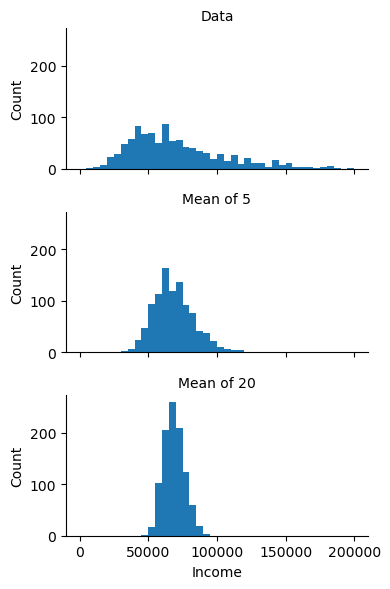

In [3]:
loans_income = pd.read_csv(LOANS_INCOME).squeeze('columns')
print('loans_income:')
display(loans_income)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})
print('sample_data:')
display(sample_data)

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})
print('sample_mean_05:')
display(sample_mean_05)

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
print('sample_mean_20:')
display(sample_mean_20)

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print('results:')
display(results)

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()


#### Bootstrap

In [4]:
number_of_times = 1000
results = []

for nrepeat in range(number_of_times):
    sample = resample(loans_income)
    results.append(sample.median())

results = pd.Series(results)
print('results')
display(results)

print('\nBootstrap Statistics')
print(f'Original: {loans_income.median()}')
print(f'Bias: {results.mean() - loans_income.median()}')
print(f'Std. Error: {results.std()}')


results


0      62000.0
1      62000.0
2      62000.0
3      62000.0
4      62000.0
        ...   
995    62000.0
996    62000.0
997    62000.0
998    62000.0
999    62000.0
Length: 1000, dtype: float64


Bootstrap Statistics
Original: 62000.0
Bias: -68.99250000000029
Std. Error: 211.00997702514906


#### Intervalos de Confiança

Mean: 68760.51844
Mean to Sample 20: 55734.1


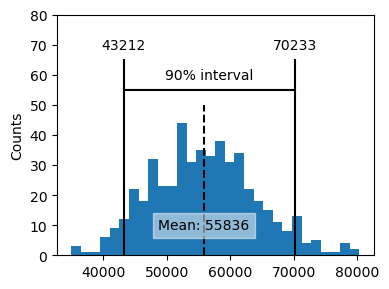

In [5]:
np.random.seed(seed=3)  

sample20 = resample(loans_income, n_samples=20, replace=False)
print(f'Mean: {loans_income.mean()}')
print(f'Mean to Sample 20: {sample20.mean()}')

# Bootstrap
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

# Plot
confidence_interval = list(results.quantile([0.05, 0.95]))

ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()


#### Distribuição Normal e o Gráfico QQ

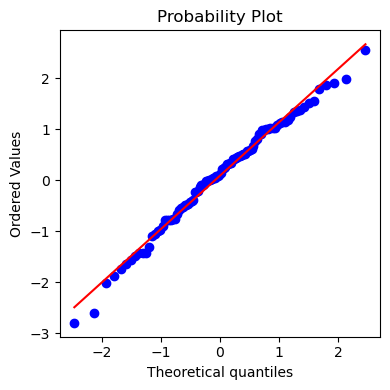

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()


#### Distribuições de Causa Longa

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1,1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
2,1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
3,1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
4,1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
5643,2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
5644,2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
5645,2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


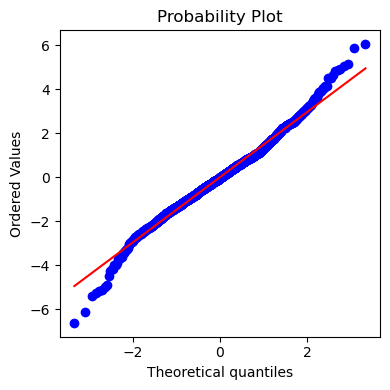

In [7]:
sp500_px = pd.read_csv(SP500_DATA_CSV)
display(sp500_px)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)
plt.tight_layout()
plt.show()


#### Distribuição Binomial

In [8]:
print(round(stats.binom.pmf(2, n=5, p=0.1), 5))
print(stats.binom.cdf(2, n=5, p=0.1))


0.0729
0.99144


#### Poisson e Distribuições Relacionadas

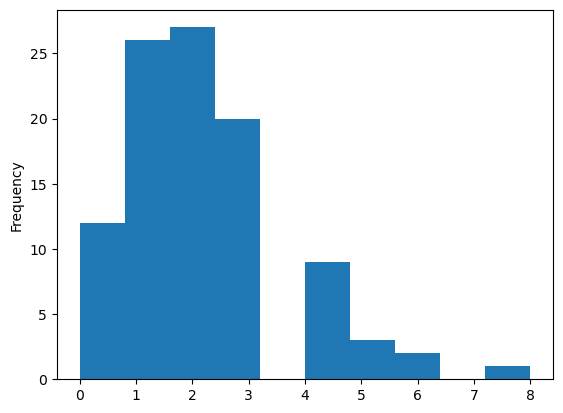

In [9]:
sample = stats.poisson.rvs(2, size=100)
pd.Series(sample).plot.hist()
plt.show()


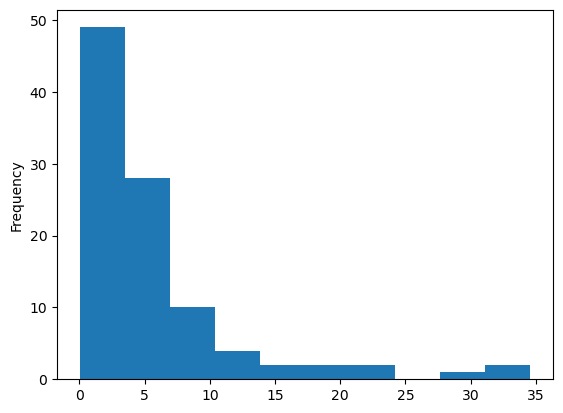

In [10]:
sample = stats.expon.rvs(scale=5, size=100)
pd.Series(sample).plot.hist()
plt.show()


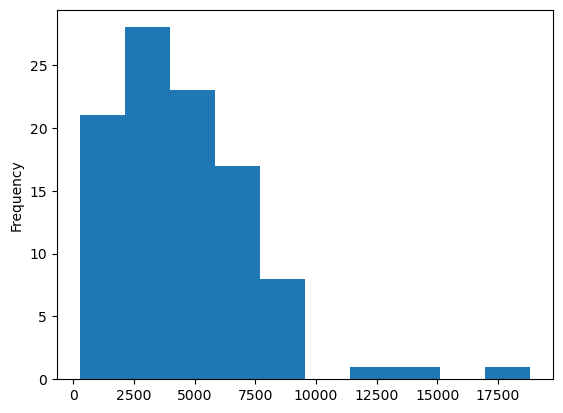

In [11]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)
pd.Series(sample).plot.hist()
plt.show()
